## Task 2: Prediction Using Supervised ML - Linear Regression

* Aim: To predict the percentage of marks of an student based on the number of study hours
* Programming Language used: Python 3
* Data source: http://bit.ly/w-data


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Read dataset
dataset = "http://bit.ly/w-data"
data = pd.read_csv(dataset)
print("Data is imported successfully")

Data is imported successfully


In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


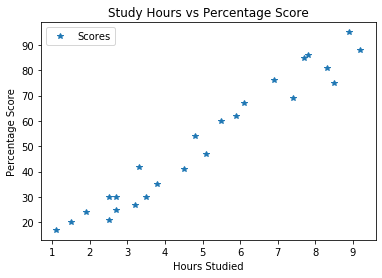

In [5]:
# Now we will Plotting the Distribution of scores

data.plot(x='Hours', y='Scores', style='*')  
plt.title('Study Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

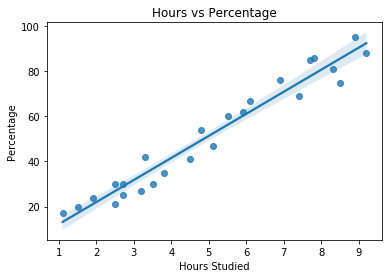

In [6]:
#To show the regression line
sns.regplot(x='Hours',y='Scores',data=data)
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage")
plt.show()

### Analysing the correlation between the variables

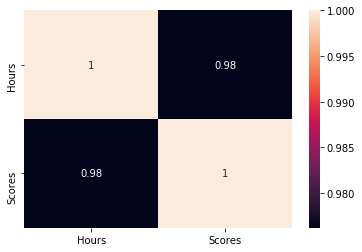

In [7]:
sns.heatmap(data.corr(), annot=True)

### Preparing the data

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [9]:
display(X,y)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [10]:
# split this data into training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
y_test.shape

(3,)

In [12]:
X_test.shape

(3, 1)

In [13]:
y_train.shape

(22,)

In [14]:
y_train.shape

(22,)

### Training the Algorithm

In [15]:
regressor = LinearRegression().fit(X_train, y_train)  
n = regressor.coef_
c = regressor.intercept_
print("Training complete.")

Training complete.


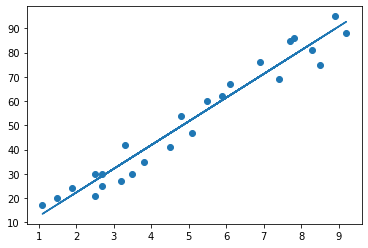

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
# Making Predictions
print(X_test)                                 # Testing data - In Hours
y_pred = regressor.predict(X_test)            # Predicting the scores

[[8.3]
 [2.5]
 [2.5]]


In [18]:
y_pred

array([83.89727817, 27.15092273, 27.15092273])

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.897278
1,30,27.150923
2,21,27.150923


In [20]:
# You can also test with your own data

hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score = 93.19193983315074


In [21]:
# evaluate the performance of algorithm
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('R2 Score:', r2_score(y_test,y_pred))
#https://scikit-learn.org/stable/modules/model_evaluation.html

Mean Squared Error: 18.11510415783113
R2 Score: 0.974047128713709
